# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

# Paso 1: Construir la matriz de términos (TF)
count_vectorizer = CountVectorizer( stop_words='english')
tf_matrix = count_vectorizer.fit_transform(newsgroupsdocs)
print(tf_matrix.shape)
# Suma el tamaño de los arrays internos
mem_data = tf_matrix.data.nbytes        # valores almacenados (no ceros)
mem_indices = tf_matrix.indices.nbytes  # posiciones de columnas
mem_indptr = tf_matrix.indptr.nbytes    # índices de inicio de filas

mem_total = mem_data + mem_indices + mem_indptr
#print(f"Tamaño en memoria: {mem_total} bytes")
print(f"Tamaño en memoria: {mem_total/1024/1024:.2f} MB")
# Extraer vocabulario (términos)
terms = count_vectorizer.get_feature_names_out()

# Paso 2: Calcular la frecuencia de documentos (DF)
df = np.array((tf_matrix > 0).sum(axis=0)).flatten()

# Paso 3: Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroupsdocs)

# Paso 4: Visualizar resultados en un DataFrame
# Visualizar los primeros 5 documentos con algunas columnas (términos)
tfidf_df_pequeño = pd.DataFrame(
    tfidf_matrix[:5, :50].toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()[:50]
)

print(f"Dimensiones del DataFrame pequeño: {tfidf_df_pequeño.shape}")
display(tfidf_df_pequeño)


(18846, 134101)
Tamaño en memoria: 14.14 MB
Dimensiones del DataFrame pequeño: (5, 50)


,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,00001100b,00001101,00001101b,00001110,00001110b,00001111,00001111b,000042,000062david42,000094
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# 1. Dada una consulta, construir el vector de consulta
consulta = "chicken" 
consulta_vec = tfidf_vectorizer.transform([consulta])

# 2. Calcular la similitud coseno entre la consulta y cada documento
similitud = cosine_similarity(consulta_vec, tfidf_matrix)
print(similitud.shape)  # Verifica la forma de la matriz de similitud
# 3. Generar ranking de documentos ordenados por relevancia (similitud descendente)
ranking_indices = similitud.argsort()[0][::-1]
ranking_similitud = similitud[0][ranking_indices]

# 4. Mostrar resultados en una tabla
resultados = pd.DataFrame({
    'Documento': ranking_indices,
    'Similitud': np.round(ranking_similitud,4),
    'Texto': [newsgroupsdocs[i] for i in ranking_indices]
    
})

print("Ranking de documentos más relevantes para la consulta:")
display(resultados.head(10))  # Muestra los 10 documentos más relevantes


(1, 18846)
Ranking de documentos más relevantes para la consulta:


,Documento,Similitud,Texto
0,1315,0.2914,\nBut remember that had God extinguished the b...
1,13222,0.2459,You are right in supposing that the problem is...
2,15919,0.2260,"\nWetteland comes off the DL on April 23rd, an..."
3,9048,0.1962,I am 35 and am recovering from a case of Chick...
4,16902,0.1883,"\n\n[stuff deleted...]\n\n \nAs I recall, the..."
5,897,0.1862,\n\nYou're reading far too much into this (asi...
6,357,0.1750,i read about the code you can put in to most a...
7,5738,0.1741,\n\nPlease note that Bill Clinton probably has...
8,11732,0.1032,These are MY last words on the subject\n\n\n\n...
9,18061,0.0965,This reminds me of the last Graham Kerr cookin...


## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [1]:
%pip install rank_bm25


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ----------------------

In [5]:
from rank_bm25 import BM25Okapi

bm25_docs = BM25Okapi(newsgroupsdocs)
consulta = "chicken"
bm25_docs.get_scores(consulta)
scores= bm25_docs.get_scores(consulta)
# Mostrar los 10 documentos más relevantes según BM25
ranking_indices_bm25 = np.argsort(scores)[::-1]
resultados_bm25 = pd.DataFrame({
    'Documento': ranking_indices_bm25,
    'BM25_Score': np.round(scores[ranking_indices_bm25], 4),
    'Texto': [newsgroupsdocs[i] for i in ranking_indices_bm25]
})
print("Ranking de documentos más relevantes según BM25:")
display(resultados_bm25.head(10))  # Muestra los 10 documentos más relevantes


Ranking de documentos más relevantes según BM25:


,Documento,BM25_Score,Texto
0,8017,10.9742,\tThe Jets gave the Canucks another run for th...
1,12695,10.9708,"\n\nI don't know, but I'm as willing to specul..."
2,10554,10.9703,"\n\nPardon me?\n\n""Greece Government Rail-Road..."
3,937,10.9642,"\nOK, as one last attempt, I'll take a differe..."
4,6533,10.9574,I have an idea as to why the encryption algori...
5,6694,10.9563,Hmmm...\n A possibility for the software regi...
6,3311,10.9557,-*----\n\nI think that Lee Lady and I are talk...
7,59,10.9531,"\nA word of warning, though: Kryptonite also ..."
8,956,10.9482,Hi.\n\nI'm not sure what the other guy (can't ...
9,10421,10.9481,Here is a revised version of my summary which ...


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [6]:
%pip install matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp311-cp311-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl (2.7 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

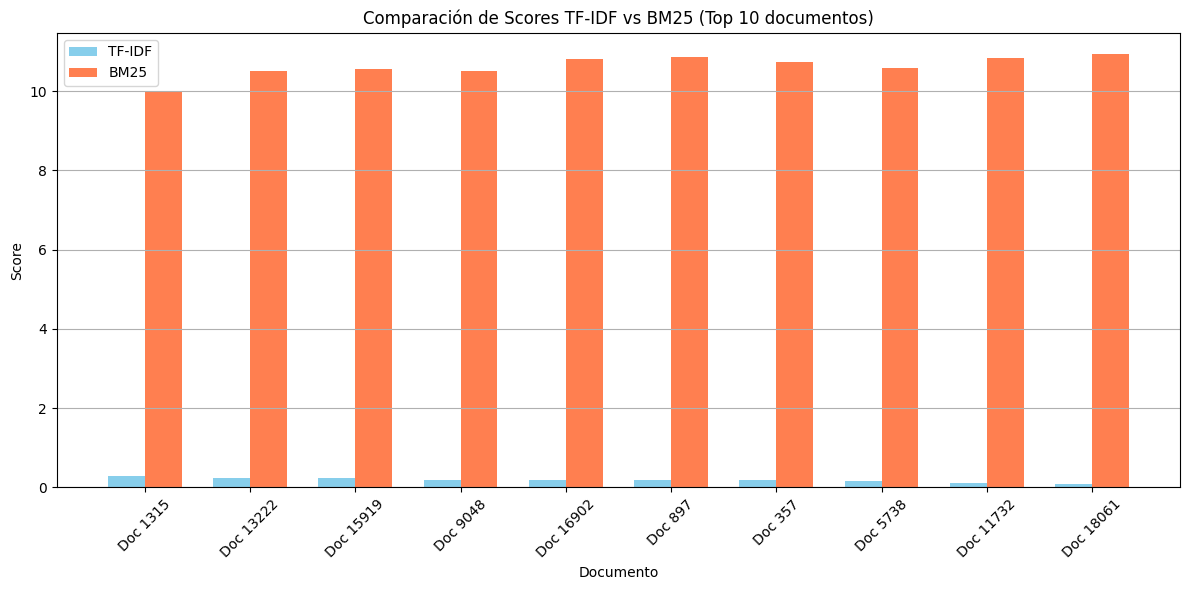

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame como antes
df_comparacion = pd.DataFrame({
    'Documento': [f'Doc {i}' for i in top_docs],
    'TF-IDF': tfidf_scores,
    'BM25': bm25_scores
})

# Posiciones para cada grupo de barras
x = np.arange(len(df_comparacion))  # las posiciones en el eje X
width = 0.35  # ancho de cada barra

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, df_comparacion['TF-IDF'], width, label='TF-IDF', color='skyblue')
bars2 = ax.bar(x + width/2, df_comparacion['BM25'], width, label='BM25', color='coral')

# Etiquetas y detalles
ax.set_title('Comparación de Scores TF-IDF vs BM25 (Top 10 documentos)')
ax.set_xlabel('Documento')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(df_comparacion['Documento'], rotation=45)
ax.legend()
ax.grid(axis='y')
plt.tight_layout()
plt.show()


## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [ ]:
# Paso 1: Definir documentos relevantes (según observación manual)
docs_relevantes = {1315, 9048, 897}

# Paso 2: Definir funciones de evaluación
def precision_at_k(ranking, relevantes, k=3):
    top_k = ranking[:k]
    relevantes_en_top_k = [doc for doc in top_k if doc in relevantes]
    return len(relevantes_en_top_k) / k

def average_precision(ranking, relevantes):
    hits = 0
    sum_precisiones = 0
    for i, doc in enumerate(ranking):
        if doc in relevantes:
            hits += 1
            sum_precisiones += hits / (i + 1)
    return sum_precisiones / len(relevantes) if relevantes else 0

# Paso 3: Obtener rankings de documentos
ranking_tfidf = resultados['Documento'].tolist()
ranking_bm25 = resultados_bm25['Documento'].tolist()

# Paso 4: Evaluar ambos modelos
p_at_3_tfidf = precision_at_k(ranking_tfidf, docs_relevantes, k=3)
p_at_3_bm25 = precision_at_k(ranking_bm25, docs_relevantes, k=3)

map_tfidf = average_precision(ranking_tfidf, docs_relevantes)
map_bm25 = average_precision(ranking_bm25, docs_relevantes)

# Paso 5: Mostrar resultados
print("=== Evaluación con consulta relevante ===")
print(f"Documentos relevantes definidos: {docs_relevantes}")
print(f"Precision@3 (TF-IDF): {p_at_3_tfidf:.2f}")
print(f"Precision@3 (BM25):  {p_at_3_bm25:.2f}")
print(f"MAP (TF-IDF):        {map_tfidf:.2f}")
print(f"MAP (BM25):          {map_bm25:.2f}")


=== Evaluación con consulta relevante ===
Documentos relevantes definidos: {9048, 897, 1315}
Precision@3 (TF-IDF): 0.33
Precision@3 (BM25):  0.00
MAP (TF-IDF):        0.67
MAP (BM25):          0.00
